# NumPy, PyPlot, and Pandas

*__Note:__ This notebook is a crash course on essential libraries for Python. If you are new to Python, please check the* Python Crash Course *first.*

Most math-heavy Python projects rely on a standard set of libraries for number manipulation ([NumPy](https://numpy.org/)), plotting ([Matplotlib / PyPlot](https://matplotlib.org/)), and data processing ([Pandas](https://pandas.pydata.org/)). The goal of this notebook is to introduce you to what each library does, and show its basic usage. In short,

* **NumPy** deals with numbers, vectors, matrices, and similar numerical structures. It allows us to do fast operations, and includes many helper libraries (random number generation, Fourier transforms, linear algebra...). Its basic data structure is the `ndarray`, a "n-dimensional array of numbers".
* **PyPlot** allows us to easily draw mathematical functions and plot data. Its parent project, **Matplotlib**, is a drawing and visualisation framework that even allows us to build interactive GUIs.
* **Pandas** deals with tabular data, similar to Excel and relational databases. It allows us to import data from external sources, filter and process it, and export it again. Its basic data structure is the `dataframe`, a table containing one column per variable and one row per data entry.

Let's start with some notebook settings and our imports:

In [90]:
%matplotlib inline

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. NumPy

### 1.1 Array Creation and Basic Operations

Suppose we are working with linear algebra and want to multiply a vector by a scalar, or a matrix by a vector. How do we do this in Python?

Without using libraries, we could use lists of numbers to represent vectors: `[ v_1, v_2, ... ]`. We could also use lists-of-lists to represent matrices: `[ [ m_11, m_12, ... ], [ m_21, m_22, ... ], ... ]`. We would then have to Use for-loops to do the operations. This raises some issues:

1. We have to make sure we make no mistakes writing the loops.
2. We have to make sure we don't accidentally make matrices where some rows are longer than others.
3. We have to make sure we don't accidentally mix data types (e.g., accidentally putting a string in our matrix).
4. Python loops execute very slowly compared to "low-level" languages like `C` or `Rust`.

Luckily, there is a standard solution to these problems: NumPy. NumPy is a widely supported library, based around the idea of *multi-dimensional arrays*, and operating on them.

Let's explore NumPy with some basic linear algebra. First, let's initialize some variables:

In [3]:
λ = np.array(1.5) # 0D array (scalar)
u = np.zeros(shape=(3,)) # 1D array (vector)
v = np.ones(shape=(3,)) # 1D array (vector)
w = np.arange(3) # 1D array (vector)
M = np.array([ [ 1, 2, 3 ], [ 4, 5, 6 ] ]) # 2D array (matrix)

print(f"[λ] type: {type(λ)}; dimensions: {λ.ndim}; shape: {λ.shape}; data type: {λ.dtype}; value: {λ}")
print(f"[u] type: {type(u)}; dimensions: {u.ndim}; shape: {u.shape}; data type: {u.dtype}; value: {u}")
print(f"[v] type: {type(v)}; dimensions: {v.ndim}; shape: {v.shape}; data type: {v.dtype}; value: {v}")
print(f"[w] type: {type(w)}; dimensions: {w.ndim}; shape: {w.shape}; data type: {w.dtype}; value: {w}")
print(f"[M] type: {type(M)}; dimensions: {M.ndim}; shape: {M.shape}; data type: {M.dtype}; value: {M}")

[λ] type: <class 'numpy.ndarray'>; dimensions: 0; shape: (); data type: float64; value: 1.5
[u] type: <class 'numpy.ndarray'>; dimensions: 1; shape: (3,); data type: float64; value: [0. 0. 0.]
[v] type: <class 'numpy.ndarray'>; dimensions: 1; shape: (3,); data type: float64; value: [1. 1. 1.]
[w] type: <class 'numpy.ndarray'>; dimensions: 1; shape: (3,); data type: int64; value: [0 1 2]
[M] type: <class 'numpy.ndarray'>; dimensions: 2; shape: (2, 3); data type: int64; value: [[1 2 3]
 [4 5 6]]


We created a scalar (number) `λ`; three vectors (1D arrays) `u`, `v`, and `w`; and a matrix (2D array) `M`. Some observations:

* All variables share the same type: `ndarray`. 
* The field `ndim` returns the number of dimensions.
* The field `shape` returns a tuple indicating the number of entries per dimension.
* The field `dtype` (*data type*) indicates what kind of data is used to represent an entry. In this case, we have `np.float64` for 64-bit floating-point numbers, and `np.int64` for 64-bit integers.

We used four different functions to initialize the arrays:

* `np.array()` converts a number, list, list of lists... into an `ndarray`.
* `np.zeros()` makes an `ndarray` with the desired shape, filled with zeros.
* `np.ones()` makes an `ndarray` with the desired shape, filled with ones.
* `np.arange()` makes a 1D `ndarray` filled with consecutive numbers (0, 1, 2...)

We are not limited to 2 dimensions. We can make higher-dimensional objects. Here is a 3D array:

In [4]:
A = np.array([
    [
        [ 111, 112, 113, 114 ],
        [ 121, 122, 123, 124 ],
        [ 131, 132, 133, 134 ],
    ],
    [
        [ 211, 212, 213, 214 ],
        [ 221, 222, 223, 224 ],
        [ 231, 232, 233, 234 ],
    ],
])

print(f"Shape: {A.shape}")
print("Contents:")
print(A)

Shape: (2, 3, 4)
Contents:
[[[111 112 113 114]
  [121 122 123 124]
  [131 132 133 134]]

 [[211 212 213 214]
  [221 222 223 224]
  [231 232 233 234]]]


If two arrays have the same size, we can do per-element operations:

In [5]:
u, v, w

(array([0., 0., 0.]), array([1., 1., 1.]), array([0, 1, 2]))

In [6]:
u + v, v + w

(array([1., 1., 1.]), array([1., 2., 3.]))

In [7]:
u * v, w * w

(array([0., 0., 0.]), array([0, 1, 4]))

Note that `*` does not perform a "typical" mathematical vector product, like the dot product or the cross product. It operates per-element. We can use methods and functions for the traditional products:

In [8]:
# https://en.wikipedia.org/wiki/Dot_product
u.dot(v), w.dot(w)

(0.0, 5)

In [9]:
# https://en.wikipedia.org/wiki/Cross_product
np.cross(v, w)

array([ 1., -2.,  1.])

For normal matrix multiplication, we can use the operator `@` instead.

In [10]:
# https://en.wikipedia.org/wiki/Matrix_multiplication
M @ u, M @ v, M @ w

(array([0., 0.]), array([ 6., 15.]), array([ 8, 17]))

In the case of two equal-length vectors, this becomes the dot product:

In [11]:
# Equivalent to u.dot(v), w.dot(w)
u @ v, w @ w

(0.0, 5)

Of course, for "proper" matrix multiplication the dimensions must match:

In [12]:
u @ M # Fails with ValueError

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

In general, NumPy prefers element-wise operations. If two arrays have different numbers of dimensions, NumPy will try to be smart and extend an element-wise operation as adequate. Multiplying a 0D array by a 1D array provides the usual scalar-vector product:

In [13]:
# Multiplies every element of the vector by the scalar value.
λ * u, λ * v, λ * w

(array([0., 0., 0.]), array([1.5, 1.5, 1.5]), array([0. , 1.5, 3. ]))

The system used to match arrays with different numbers of dimensions is called *broadcasting*. [The rules](https://numpy.org/doc/stable/user/basics.broadcasting.html) are complicated; you are not expected to master them.

#### Exercise 1

1. Create a 1D array called `x` with values `[-7, 5, -3]`.
2. Create a 2D array called `y` of shape `(2, 2)`, filled with zeroes.
3. Create a 3D array called `z` of shape `(2, 3, 4)`, filled with ones.

In [14]:
x = np.array([-7, 5, -3])
print(f"[x] type: {type(x)}; dimensions: {x.ndim}; shape: {x.shape}; data type: {x.dtype}; value: {x}")
y = np.zeros(shape=(2,2))
print(f"[y] type: {type(y)}; dimensions: {y.ndim}; shape: {y.shape}; data type: {y.dtype}; value: {y}")
z = np.ones(shape=(2,3,4))
print(f"[z] type: {type(z)}; dimensions: {z.ndim}; shape: {z.shape}; data type: {z.dtype}; value: {z}")

[x] type: <class 'numpy.ndarray'>; dimensions: 1; shape: (3,); data type: int64; value: [-7  5 -3]
[y] type: <class 'numpy.ndarray'>; dimensions: 2; shape: (2, 2); data type: float64; value: [[0. 0.]
 [0. 0.]]
[z] type: <class 'numpy.ndarray'>; dimensions: 3; shape: (2, 3, 4); data type: float64; value: [[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


#### Exercise 2

1. Calculate the scalar product $2 \cdot z$.
2. Calculate the matrix-vector product $M x$.

In [15]:
z*2
M@x

array([ -6, -21])

#### Exercise 3

1. Use `np.array()` to create a 2-by-2 matrix `T` with entries `T[0, 0] = 0`, `T[0, 1] = -1`, `T[1, 0] = 1`, `T[1, 1] = 0`. Verify that the values are correct.
2. Use `np.arange()` to create the vector `p = (1, 2)`.
3. Multiply `T` by `p` repeatedly (using matrix-vector multiplication), and print the result at every iteration. What happens to the result?

In [16]:
T = np.array([ [ 0, -1 ], [ 1, 0 ] ])
print(f"[T] type: {type(T)}; dimensions: {T.ndim}; shape: {T.shape}; data type: {T.dtype}; value: {T}")
p = np.arange(1,3)
print(p)


[T] type: <class 'numpy.ndarray'>; dimensions: 2; shape: (2, 2); data type: int64; value: [[ 0 -1]
 [ 1  0]]
[1 2]


### 1.2 More Operations

NumPy also provides common mathematical functions as element-wise operations:

In [17]:
print(f"[w]   {w}")
print(f"[exp] {np.exp(w)}")
print(f"[log] {np.log(w)}") # Raises RuntimeWarning (log(0) is problematic).
print(f"[sin] {np.sin(w)}")

[w]   [0 1 2]
[exp] [1.         2.71828183 7.3890561 ]
[log] [      -inf 0.         0.69314718]
[sin] [0.         0.84147098 0.90929743]


/tmp/ipykernel_372088/3317415454.py:3: RuntimeWarning: divide by zero encountered in log
  print(f"[log] {np.log(w)}") # Raises RuntimeWarning (log(0) is problematic).


#### Exercise 4

1. Write a function called `logistic()` that takes in an ndarray `z` and calculates the *logistic function*
$$ \sigma(\mathbf{z}) = \frac{1}{1 + e^{-\mathbf{z}}} $$
2. Apply `logistic()` to `v` and `w`.

In [19]:
def logistic(z):
    return (1/(1 + np.exp(-z)))

print(logistic(v))
print(logistic(w))
    

[0.73105858 0.73105858 0.73105858]
[0.5        0.73105858 0.88079708]


### 1.3 Basic Indexing (Reading)

NumPy arrays can be indexed by numbers:

In [21]:
u[0], v[1], w[2], M[1, 2], A[0, 1, 0]

(0.0, 1.0, 2, 6, 121)

If we don't pass a whole set of indices, we get an array:

In [23]:
print(f"==== M[1] ====\n{M[1]}") # The whole second row (first index = 1).
print(f"==== A[0] ====\n{A[0]}") # In a 3D volume, we get a 2D slice (first index = 0).
print(f"==== A[0, 1] ====\n{A[0, 1]}") # With an extra index, we get a 1D line (first two indices = (0,1)).

==== M[1] ====
[4 5 6]
==== A[0] ====
[[111 112 113 114]
 [121 122 123 124]
 [131 132 133 134]]
==== A[0, 1] ====
[121 122 123 124]


What if we want to get a *column* in M? We can use *slice* notation:

In [24]:
M[:, 0] # Get the first column (second index = 0)

array([1, 4])

We can also get a range of indices:

In [25]:
w[1:3] # Get everything where the index is 1 <= idx < 3 (3 not included).

array([1, 2])

In [26]:
A[:, :, 0:2] # Get everything where the third index is 0 <= idx < 2 (2 not included).

array([[[111, 112],
        [121, 122],
        [131, 132]],

       [[211, 212],
        [221, 222],
        [231, 232]]])

If the first number in the slice expression is 0, we can skip it:

In [27]:
A[:, :, :2] # Get everything where the third index is 0 <= idx < 2 (0 implied).

array([[[111, 112],
        [121, 122],
        [131, 132]],

       [[211, 212],
        [221, 222],
        [231, 232]]])

If the second number in the slice expression is the maximum possible, we can also skip it:

In [28]:
w[1:] # Get everything where the index is 1 <= idx < 3 (3 implied).

array([1, 2])

In other words, there are four *slicing expression* variants:
1. Give the start (inclusive) and end (exclusive): `w[1:2] == [ 1 ]`
2. Give the start (inclusive): `w[1:] == [ 1, 2 ]`
2. Give the end (exclusive): `w[:2] == [ 0, 1 ]`
3. Skip both: `w[:] == [ 0, 1, 2 ]`

#### Exercise 5

1. Use a list comprehension to create a NumPy array containing the numbers `[ 0, 1, ..., 9 ]`.
2. Use slice notation to access the sub-array `[ 2, 3, 4 ]`.

*__Hint:__ Review the Python Crash Course if you don't know what a list comprehension is.*

In [52]:
for i in range(10):
    numlist.append(i)
    
x = np.array(numlist)
y = x[2:5]
print(y)

[2 3 4]


# Exercise 6

Use slice notation to access the second column in `M`.

*__Hint:__ The resulting array has values `[2, 5]`.*

In [72]:
M[:,1]

array([2, 5])

### 1.4 Basic Indexing (Writing)

Indexing also allows us to modify an array's values:

In [73]:
Z = np.zeros(shape=(5,6))
Z[1, 5] = 1
Z

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

We can set a whole sub-array at once:

In [75]:
Z[2:4, 0:3] = 2
Z

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [2., 2., 2., 0., 0., 0.],
       [2., 2., 2., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

#### Exercise 7

1. Create a 4D array of shape `(3, 3, 3, 3)`, filled with the number 10.
2. Substitute all the entries with `third index = 1` with 5.
3. Display all the entries where all indices are at most 1.

*__Hint:__ You can use `np.full()` or a multiplication to initialize the array.*

In [85]:
D = np.ones(shape=(3,3,3,3))
D *= 10
D[:3,:3,1,:3] = 5

print(D[:2,:2,:2,:2])

[[[[10. 10.]
   [ 5.  5.]]

  [[10. 10.]
   [ 5.  5.]]]


 [[[10. 10.]
   [ 5.  5.]]

  [[10. 10.]
   [ 5.  5.]]]]


#### Exercise 8

Time for Physics! Let's simulate an object thrown from the initial location `[ 2, 4 ]`, with an initial velocity `[5, 5]`, under a gravity strength of `2`. We will store the data as `[ x, y ]` rows on a table.

1. Initialize an array named `trajectory`, with shape `(10, 2)`, and filled with zeros.
2. Set the first row of `trajectory` to `[ 2, 4 ]`.
3. Create a variable `velocity` and set it to `[ 5, 5 ]`.
4. Iteratively update the next row in `trajectory` with its previous value + the current velocity, *and then* update the velocity with a constant acceleration `[ 0, -2 ]`.
5. Print `trajectory`.

In [112]:
trajectory = np.zeros(shape=(10,2))
trajectory[0,:] = [2,4]
print(trajectory)

velocity = [5,5]

for x in range(9):
    trajectory[x+1, :] =  trajectory[x, :] + velocity
    velocity[1] -= 2

print(trajectory)

[[2. 4.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[  2.   4.]
 [  7.   9.]
 [ 12.  12.]
 [ 17.  13.]
 [ 22.  12.]
 [ 27.   9.]
 [ 32.   4.]
 [ 37.  -3.]
 [ 42. -12.]
 [ 47. -23.]]


### 1.5 Comparisons and Conditional Indexing

If we perform a numerical comparison, we obtain an array of boolean values (data type `bool`):

In [113]:
M > 2

array([[False, False,  True],
       [ True,  True,  True]])

In [114]:
(M > 2).dtype

dtype('bool')

In [115]:
v <= w

array([False,  True,  True])

Boolean arrays can be used to index into an array:

In [116]:
M[M > 2] # The array loses its shape!

array([3, 4, 5, 6])

In [117]:
M[M > 2] *= 2 # We can modify the original array in-place.
M

array([[ 1,  2,  6],
       [ 8, 10, 12]])

#### Exercise 9

1. Create a vector `twos` of shape `(5,)` filled with twos, and a vector `count` of shape `(5,)` filled with consecutive numbers (0, 1, 2...). 
2. Create a new vector `big`, and use boolean indexing to fill it with the element-wise maximum of `twos` and `count`.
3. Use `np.maximum()` to replicate point (2).

*__Hint:__ Be careful with the case `twos == count` if you're starting from an empty slate! Another solution is to use the method `copy()` to replicate an `ndarray`.*

In [133]:
twos = np.ones(shape=(5,))
twos *= 2

count = np.arange(5)

big = np.zeros(shape=(5,))

max = count > twos
for x in range(5):
    if(max[x]):
        big[x] = count[x]
    else:
        big[x] = twos[x]
print(big)

big2 = np.maximum(twos, count)
print(big2)


[2. 2. 2. 3. 4.]
[2. 2. 2. 3. 4.]


### 1.6 Random Number Generation

Sometimes, we need to collect "random" samples. NumPy provides *pseudo-random number generation* through `np.random`:

In [135]:
rng = np.random.default_rng() # Get a random generator.

rng.uniform(size=(3, 4))

array([[0.3894611 , 0.4320389 , 0.18331585, 0.50158768],
       [0.43379499, 0.63584123, 0.30260559, 0.640213  ],
       [0.06903885, 0.63333656, 0.03099551, 0.26419645]])

To generate random numbers, we need to create a `Generator`. We can get one with `default_rng()`. Once we have it, we can call its methods to generate random arrays of any given shape. Above, we used `rng.uniform()` to get uniformly distributed random floats in the range `[0, 1]`. Note the naming inconsistency: here, the shape parameter is called `size`.

We can use other random distributions:

In [136]:
rng.normal(loc=2, scale=0.5, size=(5,)) # Normal distribution with mean 2 and standard deviation 0.5

array([2.17434852, 1.99019798, 2.05933953, 1.83542381, 2.15893113])

In [137]:
rng.integers(low=-2, high=4, size=(5, 5)) # Uniformly distributed integers in range -2 <= int < 4

array([[ 0,  2, -1, -2,  1],
       [ 0, -1,  0,  0, -2],
       [ 0,  1,  2, -1, -1],
       [ 0,  2,  3,  0,  1],
       [-2,  2,  1,  3, -1]])

#### Exercise 10

1. Instantiate a new random number generator.
2. Use the new generator to create a 2-by-3 matrix with normally distributed numbers.
3. Set all negative values to 0.

In [151]:
rng = np.random.default_rng()
array = rng.normal(loc=0, scale=0.5, size=(2,3))
print(array)
array[array<0] = 0
print(array)


[[-0.3716404   0.64228745 -0.53482265]
 [ 0.3800003  -0.53698919  0.10056298]]
[[0.         0.64228745 0.        ]
 [0.3800003  0.         0.10056298]]


### 1.7 More Array Creation Techniques

If we want to sample an interval homogeneously, we can use `np.linspace()`:

In [152]:
np.linspace(2, 5)

array([2.        , 2.06122449, 2.12244898, 2.18367347, 2.24489796,
       2.30612245, 2.36734694, 2.42857143, 2.48979592, 2.55102041,
       2.6122449 , 2.67346939, 2.73469388, 2.79591837, 2.85714286,
       2.91836735, 2.97959184, 3.04081633, 3.10204082, 3.16326531,
       3.2244898 , 3.28571429, 3.34693878, 3.40816327, 3.46938776,
       3.53061224, 3.59183673, 3.65306122, 3.71428571, 3.7755102 ,
       3.83673469, 3.89795918, 3.95918367, 4.02040816, 4.08163265,
       4.14285714, 4.20408163, 4.26530612, 4.32653061, 4.3877551 ,
       4.44897959, 4.51020408, 4.57142857, 4.63265306, 4.69387755,
       4.75510204, 4.81632653, 4.87755102, 4.93877551, 5.        ])

By default, `np.linspace()` creates 50 evenly distributed samples, including both ends. We can control the number of samples with `num` and including the endpoint with `endpoint`:

In [153]:
np.linspace(0, 1, num=5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [156]:
np.linspace(-1, +1, num=8, endpoint=False)

array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75])

Sometimes, we want a new array with the same `shape` and `dtype` as an existing array. Many array creation functions have a `_like` variant that does exactly that:

In [157]:
original = rng.uniform(high=10, size=(2, 2, 2))
original

array([[[7.66250752, 4.954693  ],
        [0.41658143, 1.65254024]],

       [[6.54586358, 1.70671193],
        [6.78526081, 9.36078119]]])

In [158]:
zeros = np.zeros_like(original)
zeros

array([[[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]]])

In [159]:
ones = np.ones_like(original, dtype=np.int32)
ones

array([[[1, 1],
        [1, 1]],

       [[1, 1],
        [1, 1]]], dtype=int32)

#### Exercise 11

1. Create an array `samples` with 20 values, evenly distributed between 10 (inclusive) and 15 (exclusive).
2. Create an array `values_0` that corresponds to $3 \cdot samples - 1$.
3. Create an array `values` by adding uniform random numbers between -0.5 (inclusive) and +0.5 (exclusive) to `values_0`.

In [174]:
# Your code here
rng = np.random.default_rng()
samples = np.linspace(10, 15, num=20, endpoint=False)
print(sample)
values_0 = 3 * samples - 1
print(values_0)
values = values_0 + rng.uniform(low=-0.5, high=0.5, size=20)
print(values)

[10.   10.25 10.5  10.75 11.   11.25 11.5  11.75 12.   12.25 12.5  12.75
 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75]
[29.   29.75 30.5  31.25 32.   32.75 33.5  34.25 35.   35.75 36.5  37.25
 38.   38.75 39.5  40.25 41.   41.75 42.5  43.25]
[29.08182924 29.58483367 30.59852428 30.80943023 31.90514696 33.06556482
 33.09225249 34.24200925 34.86522536 35.57461323 36.16351729 36.92703658
 37.685657   38.45704948 39.79024211 40.00126453 41.47432629 41.45003792
 42.5346368  43.69699174]


## 2 PyPlot

It's not enough to handle data and do math if we cannot visualize it. Sometimes the visualization is our final goal; sometimes it's a useful debugging tool. In any case, PyPlot is the go-to plotting library.

### 2.1 Just Plot

Let's start with a simple example: plotting a nice, smooth function.

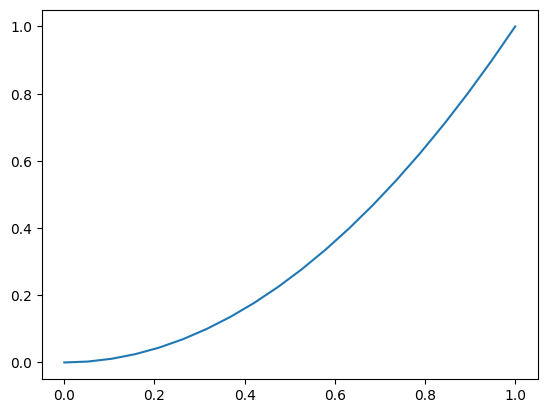

In [175]:
x = np.linspace(start=0, stop=1, num=20)
y0 = x ** 2

plt.plot(x, y0)

All we need is `plt.plot()`, passing the horizontal and vertical coordinates as 1D arrays.

We can also add a shorthand string to change the visualization style:

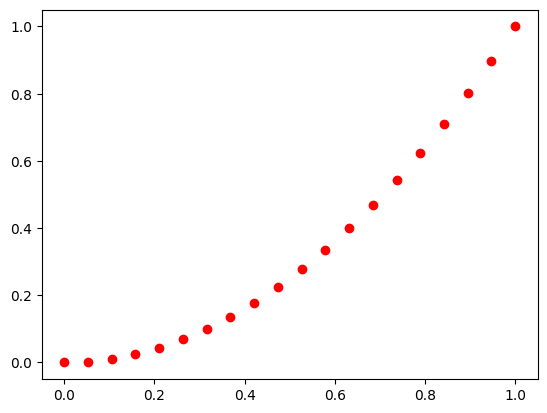

In [176]:
plt.plot(x, y0, "ro")

The typical shorthands are a color letter followed by a line style sign:
* `r` red, `b` blue, `k` black...
* `-` normal line, `--` dashed line, `o` circular marker, `+` vertical cross marker, `x` diagonal cross marker...

Above, `"ro"` translated to "red circles". The same can be written more explicitly with keyword parameters:

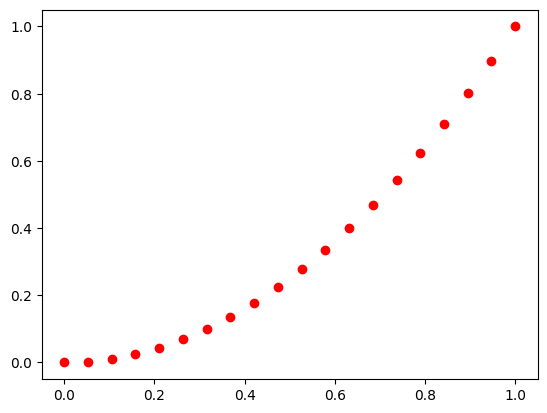

In [177]:
plt.plot(x, y0, color="red", marker="o", linestyle="none")

A scientific plot needs labeled axes, and maybe a title. PyPlot allows you to build a plot over several steps.

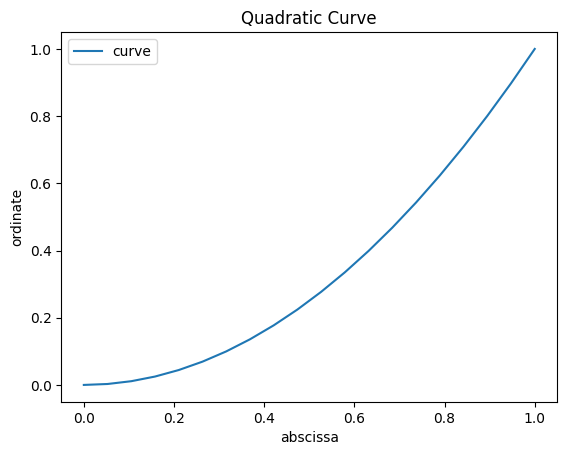

In [178]:
plt.plot(x, y0)

plt.title("Quadratic Curve")
plt.xlabel("abscissa")
plt.ylabel("ordinate")
plt.legend([ "curve" ])

plt.show()

Some notes:

* Notice the use of `plt.show()` at the end. In a notebook, this is optional, *unless* we're trying to display several plots in a single cell. `plt.show()` signals PyPlot to display the current plot, and then close / delete it.
* Notice that if we finish the cell with one of the plotting commands (`plt.plot()`, `plt.title()`...), we get strange messages in the output, like `[<matplotlib.lines.Line2D at 0x7febcd5c4640>]`. This is because these functions return handles used for some advanced drawing commands. As usual, Jupyter is trying to display the last returned object.

In particular, this means that if we *don't* use `plt.show()`, we can combine several graphs in one go. Let's add some noise to show that:

In [179]:
rng = np.random.default_rng()

# Normally distributed noise that gets noisier as x increases
y = y0 + x * rng.normal(scale=0.1, size=x.shape)

Text(0.5, 1.0, 'Combined Graphs')

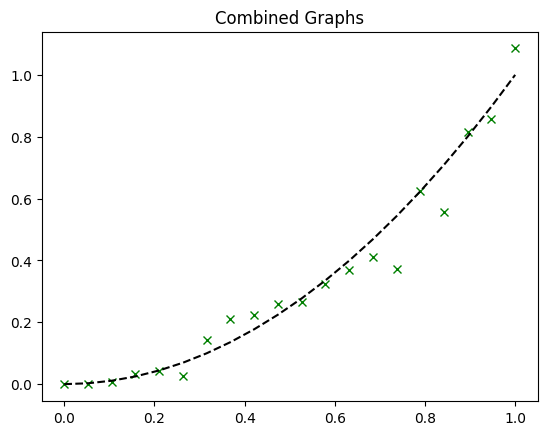

In [180]:
plt.plot(x, y, "gx")
plt.plot(x, y0, "k--")
plt.title("Combined Graphs")

`plt.plot()` allows us to do this in a single call, for simple cases:

In [ ]:
plt.plot(x, y, "gx", x, y0, "k--")

#### Exercise 12

Plot the data from Exercise 11: use `samples` as the abcissa; use `values` and `values_0` as the ordinates. 

1. Use `plt.show()` to make two separate plots in a single cell: one for `values`, and one for `values_0`.
2. Use your favorite method to combine both graphs into one. Make sure to use different colors and styles for each graph, and have a clear legend.

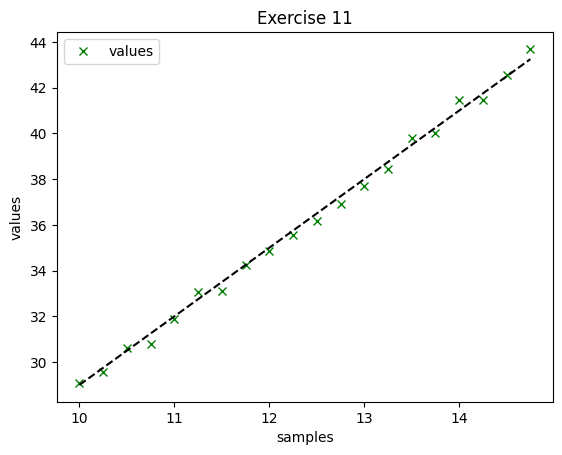

In [200]:
plt.title("Exercise 11")
plt.plot(samples, values, "gx")
plt.xlabel("samples")
plt.ylabel("values")
plt.legend([ "values" ])
plt.plot(samples, values_0, "k--")

plt.show()

### 2.2 Plot the Matrix

So far, we have discussed the basic usage for PyPlot: showing single-variable graphs. However, it can also be used to display other kinds of data. As a first example, we can use `plt.matshow()` to display matrices. Let's create a small random matrix and see how this looks:

array([[0, 6, 1, 0, 2],
       [1, 4, 6, 2, 1],
       [0, 8, 8, 1, 6],
       [9, 8, 9, 8, 7],
       [3, 3, 6, 3, 5]])

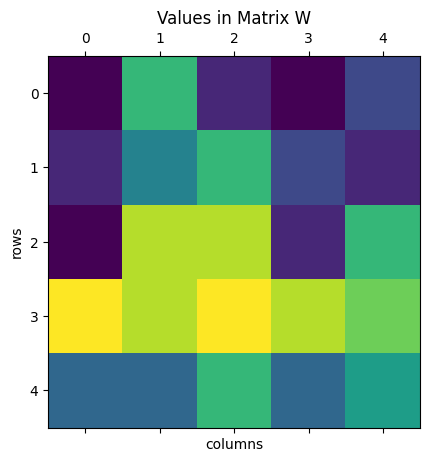

In [201]:
W = rng.integers(low=0, high=10, size=(5, 5))

plt.matshow(W)
plt.title("Values in Matrix W")
plt.xlabel("columns")
plt.ylabel("rows")

W

This helps understand the data at a glance when there are too many numbers to process, but we lose sight of what the colors mean. We can add a reference bar with `plt.colorbar()`:

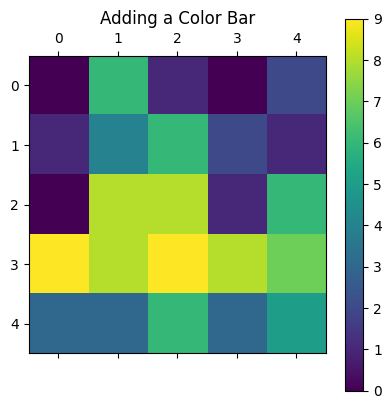

In [202]:
plt.matshow(W)
plt.colorbar()
plt.title("Adding a Color Bar")
plt.show()

By default, PyPlot uses a *color map* to display the lowest value as dark blue and the highest as bright yellow. This helps us to identify different values. If we prefer grayscale, we can specify the color map:

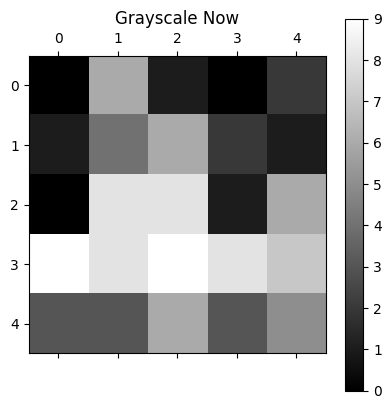

In [203]:
plt.matshow(W, cmap="gray")
plt.colorbar()
plt.title("Grayscale Now")
plt.show()

There are [many colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) defined in PyPlot, and with enough effort you can even design your own.

#### Exercise 13

1. Create a 12-by-12 matrix, and fill each row by normal noise, scaled by the row number.
2. Display the matrix with `plt.matshow()` and `plt.colorbar()`.

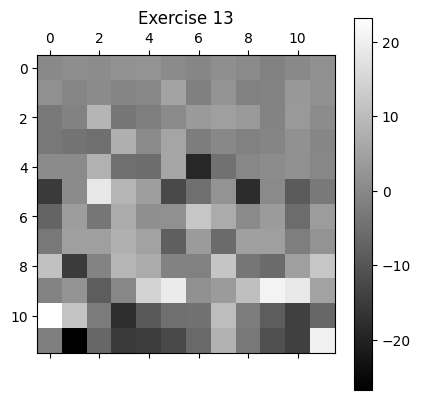

In [268]:
matrix = np.ones(shape=(12,12))
# print("matrix:\n", matrix, "\n")
for i in range(12):
#     print("iteration: ", i, "\n")
    random = rng.normal(scale=i+1, size = matrix.shape[1])
#     print("random num: \n", random, "\n")
    matrix[i,:] *= random
    
# print("new matrix:\n", matrix)
plt.matshow(matrix, cmap="gray")
plt.colorbar()
plt.title("Exercise 13")
plt.show()


## 3 Pandas

### 3.1 DataFrames

Pandas is the go-to library for working with tabular data (think Excel sheets, or Google Sheets). Its basic data structure is the `DataFrame`:

In [269]:
teaching_assistants = pd.DataFrame({
    "given_name"  : [ "Marc"  , "Alessio" , "Lux"    , ],
    "family_name" : [ "Fraile", "Galatolo", "Miranda", ],
    "lab"         : [ 1       , 2         , 3        , ],
})

teaching_assistants

,given_name,family_name,lab
0,Marc,Fraile,1
1,Alessio,Galatolo,2
2,Lux,Miranda,3


In the above example, you can see each column is a named variable, and each row is a numbered entry. We can get a column indexing by name:

In [270]:
teaching_assistants["given_name"]

0       Marc
1    Alessio
2        Lux
Name: given_name, dtype: object

Note that a single column is printed in a different style as a multi-column `DataFrame`. Single columns have their own type called `Series`. These two classes behave slightly differently.

In [271]:
type(teaching_assistants["given_name"])

pandas.core.series.Series

We can also choose *several* columns by indexing with a list:

In [272]:
teaching_assistants[[ "family_name", "given_name" ]]

,family_name,given_name
0,Fraile,Marc
1,Galatolo,Alessio
2,Miranda,Lux


Note that we can reorder the columns by indexing in a specific order.

To get specific rows, you will need to use the *indexing helpers* `loc` and `iloc`. We can use slice notation to get a few rows:

In [273]:
teaching_assistants.loc[1:2]

,given_name,family_name,lab
1,Alessio,Galatolo,2
2,Lux,Miranda,3


*__Note:__ Unlike standard Python and NumPy, `loc` includes the end of the slice (2 in this case).*

Or we can go more precise: specify both rows and columns.

In [274]:
teaching_assistants.loc[1:2, [ "given_name", "lab" ]]

,given_name,lab
1,Alessio,2
2,Lux,3


While `loc` respects the type of the rows and columns (e.g., indexing by name), `iloc` indexes by position.

In [275]:
teaching_assistants.iloc[1:3, [0, 2]]

,given_name,lab
1,Alessio,2
2,Lux,3


*__Note:__ Unlike its sibling `loc`, the accessor `iloc` follows the Python / NumPy standard way of indexing, so we have to write `1:3` (3 not included).*

We can retrieve the column names, and the index (row keys), as fields in the dataframe:

In [276]:
print(teaching_assistants.columns)
print(teaching_assistants.index)

Index(['given_name', 'family_name', 'lab'], dtype='object')
RangeIndex(start=0, stop=3, step=1)


So far, we worked with the default numerical index. But we can also set one of the columns as the new index:

In [277]:
teaching_assistants = teaching_assistants.set_index("given_name")
teaching_assistants

,family_name,lab
given_name,,
Marc,Fraile,1
Alessio,Galatolo,2
Lux,Miranda,3


In [278]:
teaching_assistants.index

Index(['Marc', 'Alessio', 'Lux'], dtype='object', name='given_name')

Now `loc` takes strings for the first value as well, while `iloc` still takes numbers:

In [279]:
teaching_assistants.loc[[ "Lux", "Alessio" ], "family_name"]

given_name
Lux         Miranda
Alessio    Galatolo
Name: family_name, dtype: object

In [280]:
teaching_assistants.iloc[[2, 1], 0]

given_name
Lux         Miranda
Alessio    Galatolo
Name: family_name, dtype: object

#### Exercise 14

1. Make a dataframe called `animals`, with columns `[ "name", "legs", "flies" ]`, and rows corresponding to dog, pidgeon, spider, fly. `name` should be a string, `legs` an integer, and `flies` a boolean.
2. Set `name` as the index of the dataframe.
3. Use `loc` to access the number of legs for every animal after pidgeon.
4. Use `iloc` to access the same data.

In [332]:
# Your code here
animals = pd.DataFrame({
    "name"  : [ "dog"  , "pidgeon" , "spider"    , "fly"  ],
    "legs" : [ "4", "2", "8", "6"],
    "flies"         : [ False       , True        , False        , True ],
})
animals.set_index("name")
print("loc:")
print(animals.loc[[2,3],"legs"])
print("")

print("iloc:")
print(animals.iloc[[2,3], 1])

loc:
2    8
3    6
Name: legs, dtype: object

iloc:
2    8
3    6
Name: legs, dtype: object


### 3.2 Reading CSV

It's time to use some bigger examples, with data that has already been collected. A very common format are CSV files: literally, *Comma-Separated Values*. These are text files with extension `.csv`, and contain tabular data as one line per row, separating columns with commas.

The companion file `country_codes.csv` is a table mapping every country's name to its ISO 3166 alpha-2 code (the international standard for 2-letter country codes). First, we can inspect the head of the file to get a feeling for the format:

In [333]:
with open("country_codes.csv", "r") as file:
    lines = file.readlines()

for i in range(10):
    print(f"[{i}] {lines[i].strip()}")

[0] Name,Code
[1] Afghanistan,AF
[2] Åland Islands,AX
[3] Albania,AL
[4] Algeria,DZ
[5] American Samoa,AS
[6] Andorra,AD
[7] Angola,AO
[8] Anguilla,AI
[9] Antarctica,AQ


The first line contains the column names, and every subsequent line contains a row. We can see further down that the CSV format gets messy if a column contains text with commas:

In [334]:
for i in range(26, 30):
    print(f"[{i}] {lines[i].strip()}")

[26] Bhutan,BT
[27] "Bolivia, Plurinational State of",BO
[28] "Bonaire, Sint Eustatius and Saba",BQ
[29] Bosnia and Herzegovina,BA


Not to worry! Pandas handles everything with `pd.read_csv()`.

In [86]:
countries = pd.read_csv("country_codes.csv")
countries

,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS
...,...,...
244,Wallis and Futuna,WF
245,Western Sahara,EH
246,Yemen,YE
247,Zambia,ZM


Pandas is smart enough to avoid printing the whole 249 rows. If we want more control over seeing the first few entries, we can use the method `head()`:

In [336]:
countries.head(10)

,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS
5,Andorra,AD
6,Angola,AO
7,Anguilla,AI
8,Antarctica,AQ
9,Antigua and Barbuda,AG


This matches more closely what we saw when exploring the raw file. We can also see that Pandas has correctly used the first line as the column names, and has created a numerical index.

#### Exercise 15

1. Use `set_index()` to create a copy of `countries` that uses the column `Name` as the index. Assign the new copy to a variable called `by_name`.
2. Use `loc` to get Sweden's country code.

In [349]:
# Your code here
bynames = countries.set_index("Name")
print(bynames.loc["Sweden"])

Code    SE
Name: Sweden, dtype: object


### 3.3 Logical Indexing

Just like NumPy, Pandas can use comparisons to index into an array. For example, if we want to get Sweden's code without changing the index:

In [350]:
countries[countries["Name"] == "Sweden"]

,Name,Code
214,Sweden,SE


Columns containing string values have a field called `str` that allows us to perform string operations on each entry. For example, we can use `startswith()` to check which entries start with a certain letter.

In [351]:
index = countries["Name"].str.startswith("U")
# List all unique values in a Series, and how many times they appear.
index.value_counts()

Name
False    241
True       8
Name: count, dtype: int64

In [352]:
countries[index]

,Name,Code
231,Uganda,UG
232,Ukraine,UA
233,United Arab Emirates,AE
234,United Kingdom,GB
235,United States,US
236,United States Minor Outlying Islands,UM
237,Uruguay,UY
238,Uzbekistan,UZ


#### Exercise 16

Use logical indexing to find all the countries whose first 2 letters (after capitalizing) correspond with their country code.

*__Hint:__ If you want to chain string operations, you will have to write `.str` several times.*

In [88]:
countries["first_two"] = countries["Name"].str.upper().str[:2]

chosen_countries = countries[countries["first_two"] == countries["Code"]]

print(chosen_countries["Name"])
# print(countries.head(10))


0                            Afghanistan
2                                Albania
10                             Argentina
13                             Australia
15                            Azerbaijan
21                               Belgium
26       Bolivia, Plurinational State of
31                                Brazil
39                                Canada
48                              Colombia
56                                  Cuba
58                                Cyprus
59                        Czech Republic
61                              Djibouti
63                    Dominican Republic
64                               Ecuador
65                                 Egypt
68                               Eritrea
70                              Ethiopia
74                               Finland
75                                France
79                                 Gabon
81                               Georgia
83                                 Ghana
84              

### 3.4 Saving CSV

We can save a `DataFrame` into a CSV file by using `to_csv()`:

In [385]:
teaching_assistants.to_csv("teaching_assistants.csv")

#### Exercise 17

Save the `animals` dataframe from Exercise 14 to a CSV file called `animals.csv`.

In [386]:
# Your code here
animals.to_csv("animals.csv")

#### Exercise 18

In this final Pandas example, we will investigate a larger dataset of nominees and winners for the Academy Awards (the Oscars), from the 1920s to the 2010s.

1. Use `read_csv()` to load the companion file `oscar_nominations.csv`.
2. Use any method you like to inspect the entries in the dataset (*__Hint:__ It's too big to print out, use an aggregate method*).
3. Use the `Series` method `unique()` to get a list of the years covered by this dataset.
4. Figure out how to use `groupby()` and `count()` to obtain a `Series` mapping each year to the number of entries for that year. Use `plt.plot()` to display this information in a graph.
5. Use boolean expressions (comparisons) to obtain the nominees (and winner) for the 2017 best picture award. Display the `entity` and `winner` columns as a separate dataframe.

ten first entries:
   year        category  winner                   entity
0  1927           ACTOR   False      Richard Barthelmess
1  1927           ACTOR    True            Emil Jannings
2  1927         ACTRESS   False           Louise Dresser
3  1927         ACTRESS    True             Janet Gaynor
4  1927         ACTRESS   False           Gloria Swanson
5  1927   ART DIRECTION   False            Rochus Gliese
6  1927   ART DIRECTION    True  William Cameron Menzies
7  1927   ART DIRECTION   False             Harry Oliver
8  1927  CINEMATOGRAPHY   False            George Barnes
9  1927  CINEMATOGRAPHY    True           Charles Rosher 

unique years:
[1927 1928 1929 1930 1931 1932 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955
 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 199

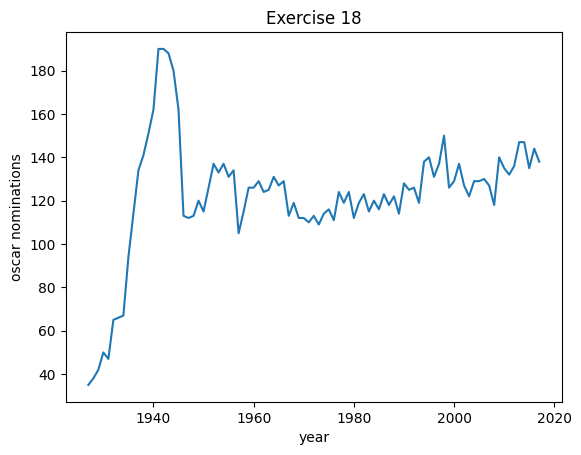

In [93]:
# Your code here

#1.
oscar_nominations = pd.read_csv("oscar_nominations.csv")

#2.
print("ten first entries:")
print(oscar_nominations.head(10), "\n")

years = oscar_nominations["year"]
# print("years:")
# print(years,"\n")

#3.
unique_years = years.unique()
print("unique years:")
print(unique_years,"\n")

#4.
year_grpd = years.groupby(years).count()
# print(year_grpd)
# print("\n")
plt.plot(year_grpd)
plt.title("Exercise 18")
plt.xlabel("year")
plt.ylabel("oscar nominations")
# 

#5.
# noticed the years were off by a year so used 2016 :D
nominees = oscar_nominations[(oscar_nominations["year"] == 2016) & (oscar_nominations["category"] == "BEST PICTURE")]["entity"]
print("2017 nominees:")
print(nominees.head(10),"\n")

winner = oscar_nominations[(oscar_nominations["winner"]) & (oscar_nominations["year"] == 2016) & (oscar_nominations["category"] == "BEST PICTURE")]["entity"]
print("2017 winner")
print(winner)



#### Bonus Exercise

1. Calculate the number of *nominees* per category in the 2017 gala.
2. Calculate the number of *winners* per category in the 2017 gala.
3. Use `plt.bar()` to display, in a single graph, the number of nominees and winners for each category. Display the category names in the x axis.
4. Save the figure you just created as `oscar_categories_2017.png`.

In [65]:
# Your code here